# Figure 2


In [21]:
import pandas as pd
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from tqdm import tqdm
import plotly.graph_objects as go
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import TwoSlopeNorm  # Use CenteredNorm for newer matplotlib versions
from scipy.stats import pearsonr
import matplotlib.patches as mpatches


In [144]:
df=pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
df=df.rename(columns={'aggregated_value':'count', 'country':'Mention_country', 'affiliation_country':'Aff_country'})

df=df[df['year'].isin(np.arange(2003, 2019, 1))]
Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]
physical_sciences=[ 'MATH', 'ENGI', 'PHYS', 'COMP','MULT']
df=df[~df['subjarea'].isin(physical_sciences)]

In [145]:
def find_cat(subject):
        
    social_sciences=['PSYC', 'SOCI', 'DECI', 'ARTS', 'ECON', 'BUSI']
    health_sciences=['MEDI', 'NURS', 'DENT', 'HEAL', 'VETE']
    physical_sciences=['CHEM', 'EART', 'ENER', 'CENG',  'ENVI','MATE']
    life_sciences=['PHAR', 'NEUR', 'AGRI', 'IMMU', 'BIOC']
    if subject in social_sciences:
        return 'Social sciences'
    elif  subject in health_sciences:
        return 'Health sciences'
    elif subject in physical_sciences:
        return 'Physical sciences'
    elif subject in life_sciences:
        return 'Life sciences'
    else:
        return subject

In [146]:
df=df[(df['Mention_country'].isin(abbr))]
df['cat']=df['subjarea'].apply(find_cat)
df['year_arabspring']=df['year'].apply(lambda x: 'before' if x>=2003 and x<=2010 else 'after' )
result_df=df.groupby(['cat','Mention_country', 'year_arabspring'])['count'].sum().reset_index()

total_df=result_df.groupby(['Mention_country','year_arabspring'])['count'].sum().reset_index().rename(columns={'count':'total'})

result_df=result_df.merge(total_df, on=['Mention_country','year_arabspring'])
result_df['Share']=result_df['count']/result_df['total']

In [20]:
def plot(results, category_names,ax, value, hatch, start_values):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('Accent')(
        np.linspace(0.15, 0.85, data.shape[1]))

   # ax.yaxis.set_visible(False)
    handles=[]
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        handles.append(mpatches.Patch(facecolor=color, label=colname))
        heights = data[:, i]
        starts = data_cum[:, i] - heights
        if hatch:
            edge_col='gray'
            add_string='\nPost Arab spring'
        else:
            edge_col=None
            add_string='\nPre Arab spring'
        rects = ax.bar(start_values, heights, bottom=starts, width=0.5, color=color,linewidth=1, hatch=hatch, edgecolor=edge_col)
    
            
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.35 else 'k'
        ax.bar_label(rects, label_type='center', color=text_color, fontsize=6)
        #ax.set_xticks([0,0.5, 1.5, 2], ['Before', 'After', 'Before', 'After'], fontsize=9, rotation=90)
    
    handles.append(mpatches.Patch(facecolor='white', label='Before Arab spring\n   2003-2010', edgecolor='gray'))
    handles.append(mpatches.Patch(facecolor='white', label='After Arab spring\n    2011-2018', hatch='////',edgecolor='gray'))

    if value==4:
        ax.legend(handles=handles,ncols=1, bbox_to_anchor=(1, 0.5),
              loc='upper left', fontsize='small', frameon=False, labelspacing=1.5)



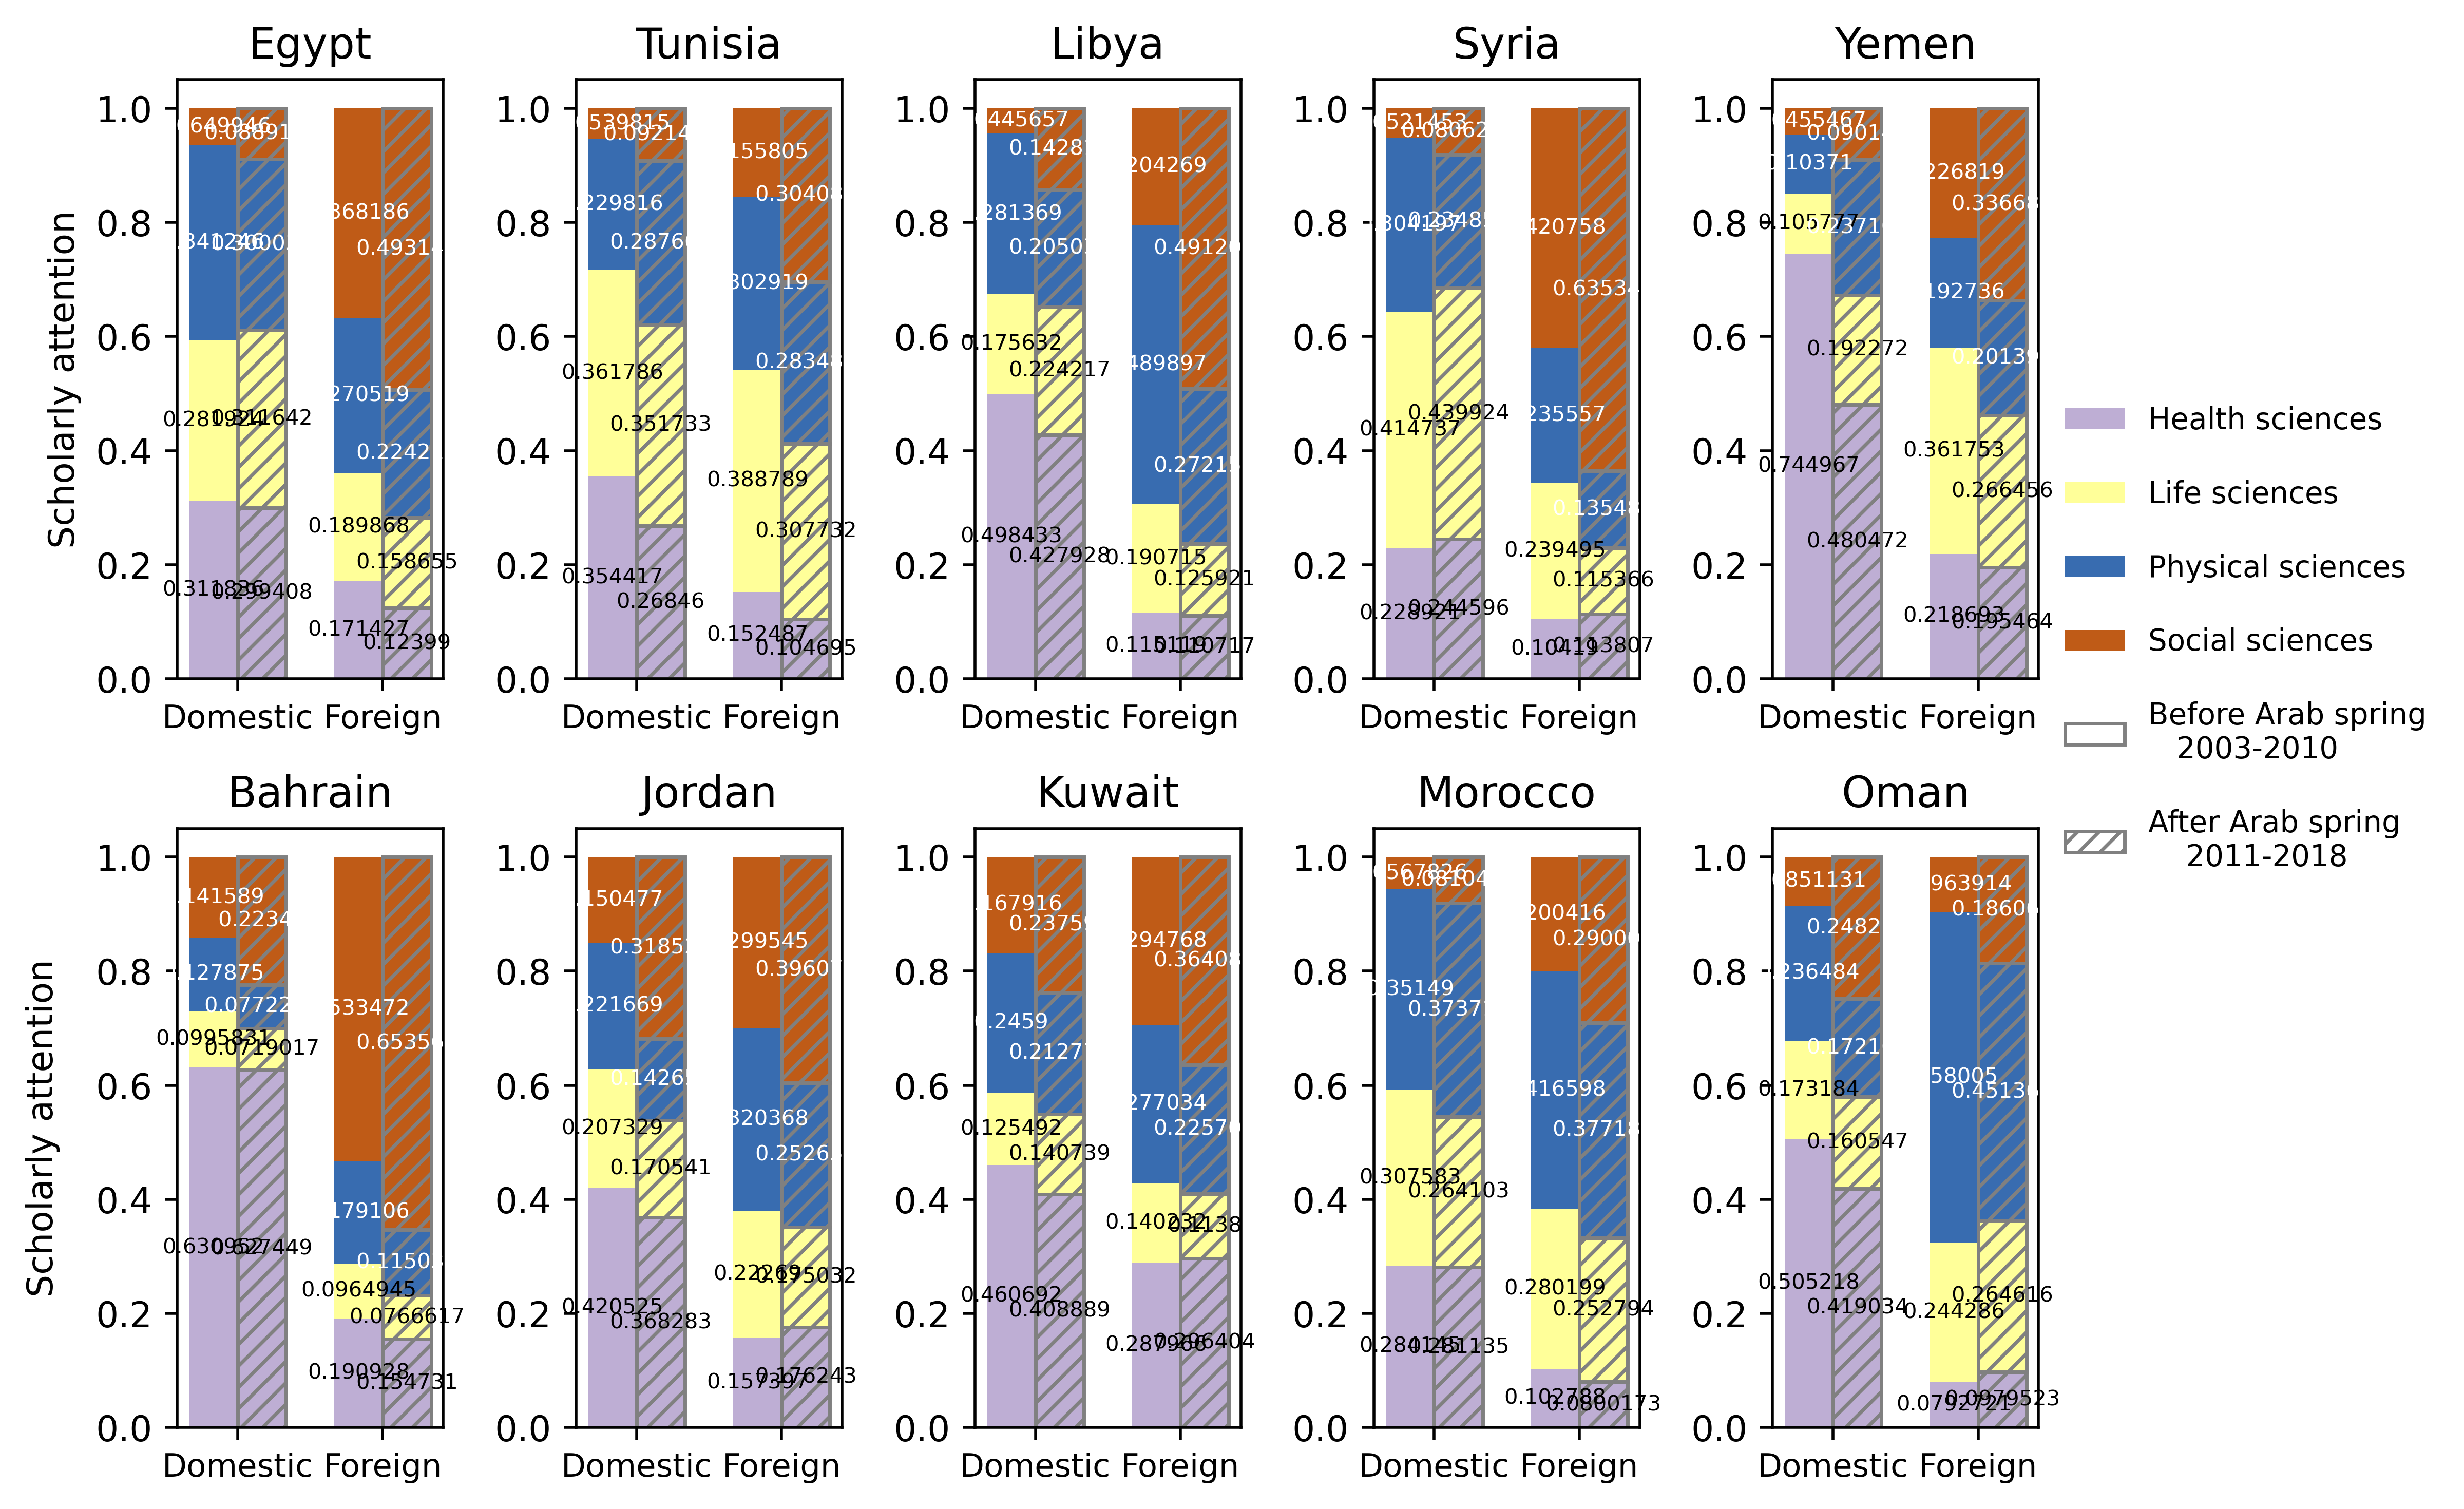

In [25]:
fig, ax=plt.subplots(nrows=2, ncols=5,figsize=(10, 6), dpi=500)
ax=ax.flat

for i, country in enumerate(abbr):

    
    category_names = sorted(result_df.cat.unique())
    results1 = {
        'Question 1':result_df.query(f"(Mention_country == '{country}') &(year_arabspring== 'before') &(is_internal_attention==True)").sort_values(by='cat')['Share'].values
,
                'Question 3': result_df.query(f"(Mention_country == '{country}') &(year_arabspring== 'before') &(is_internal_attention==False)").sort_values(by='cat')['Share'].values
,
    }
    results2={
     
        'Question 2': result_df.query(f"(Mention_country == '{country}') &(year_arabspring== 'after') &(is_internal_attention==True)").sort_values(by='cat')['Share'].values
    ,
        'Question 4': result_df.query(f"(Mention_country == '{country}') &(year_arabspring== 'after') &(is_internal_attention==False)").sort_values(by='cat')['Share'].values

    }
    plot(results1, category_names,ax[i], i, None, [0, 1.5])
    plot(results2, category_names,ax[i], i, '////', [.5, 2])
    ax[i].set_title(rev_Country_list[country.upper()])
    ax[i].set_xticks([0.25, 1.75],['Domestic', 'Foreign'], fontsize=9)
    ax[i].annotate('Starting', xy =(0.3, -30), 
             xytext =(0.3, -30)   ) 
ax[0].set_ylabel('Scholarly attention')
ax[5].set_ylabel('Scholarly attention', labelpad=10)
fig.subplots_adjust(left=0.1, right=0.825, top=0.95, bottom=0.075, hspace=0.25, wspace=0.5)
fig.savefig('Final_figure3_ver2.pdf')
plt.show()

In [57]:
result_df


,cat,Mention_country,year_arabspring,count,total,Share
0,Health sciences,bhr,after,307.311173,656.671560,0.467983
1,Health sciences,bhr,before,185.966866,373.128399,0.498399
2,Health sciences,egy,after,2942.411026,12282.431745,0.239563
3,Health sciences,egy,before,1178.860186,4641.229280,0.253997
4,Health sciences,jor,after,1532.158892,5379.429146,0.284818
...,...,...,...,...,...,...
75,Social sciences,syr,before,204.974552,700.328929,0.292683
76,Social sciences,tun,after,911.627899,5780.883316,0.157697
77,Social sciences,tun,before,232.809674,2845.636333,0.081813
78,Social sciences,yem,after,295.720040,1106.858081,0.267171


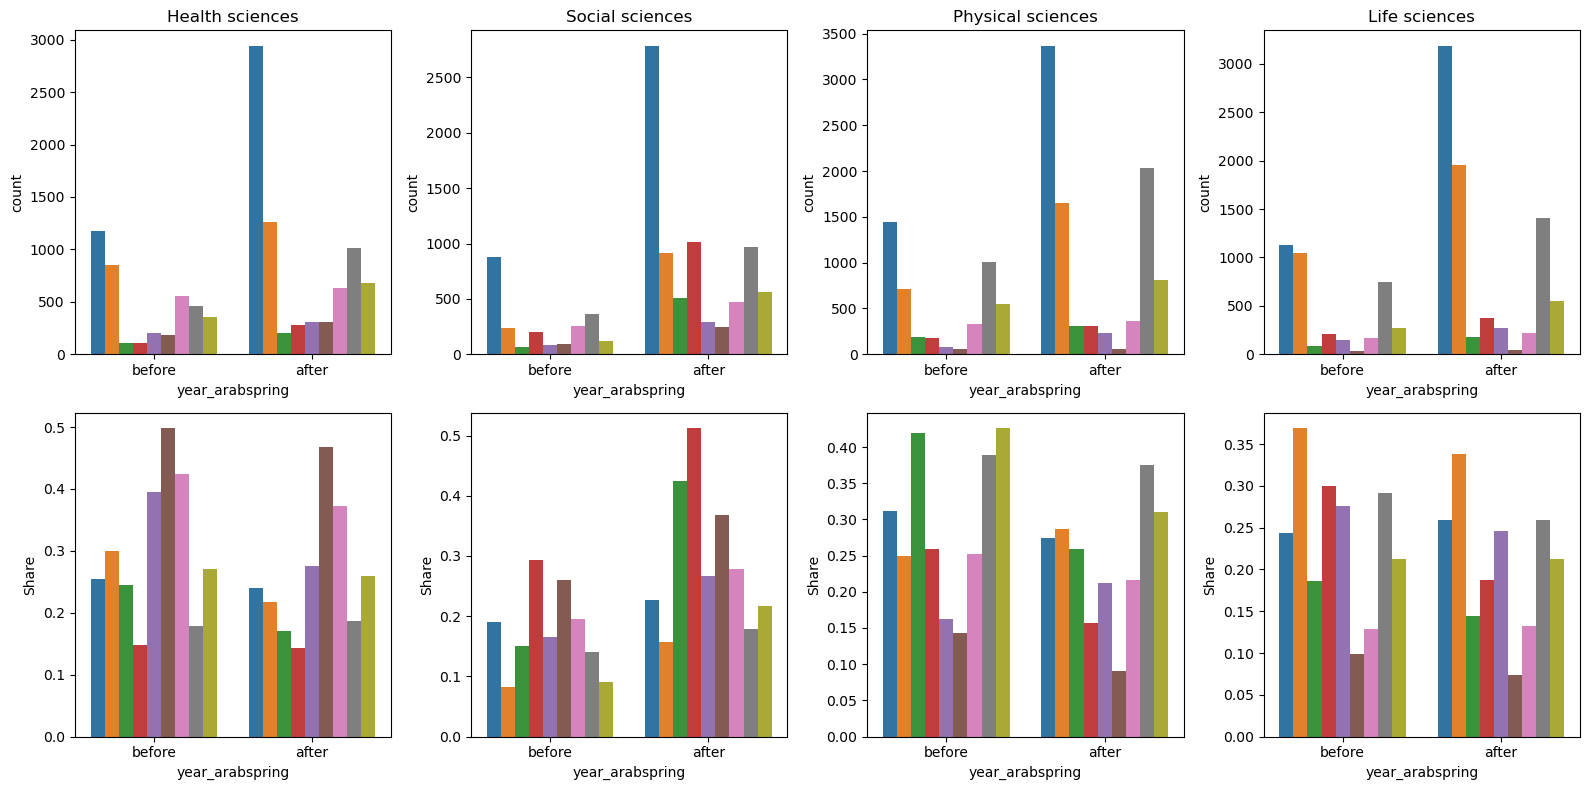

In [64]:
fig, ax=plt.subplots(nrows=2, ncols=4, figsize=(16,8))

for i, category in enumerate(['Health sciences', 'Social sciences', 'Physical sciences', 'Life sciences']):
    sns.barplot(data=result_df.query(f'cat=="{category}"'), x='year_arabspring', y='count', ax=ax[0][i], hue='Mention_country', legend=False, order=['before', 'after'], hue_order=['egy', 'tun', 'lby', 'syr', 'yem', 'bhr', 'kwt', 'mar', 'omn'])
    sns.barplot(data=result_df.query(f'cat=="{category}"'), x='year_arabspring', y='Share', ax=ax[1][i], hue='Mention_country', legend=False, order=['before', 'after'], hue_order=['egy', 'tun', 'lby', 'syr', 'yem', 'bhr', 'kwt', 'mar', 'omn'])

    ax[0][i].set_title(category)

fig.tight_layout()

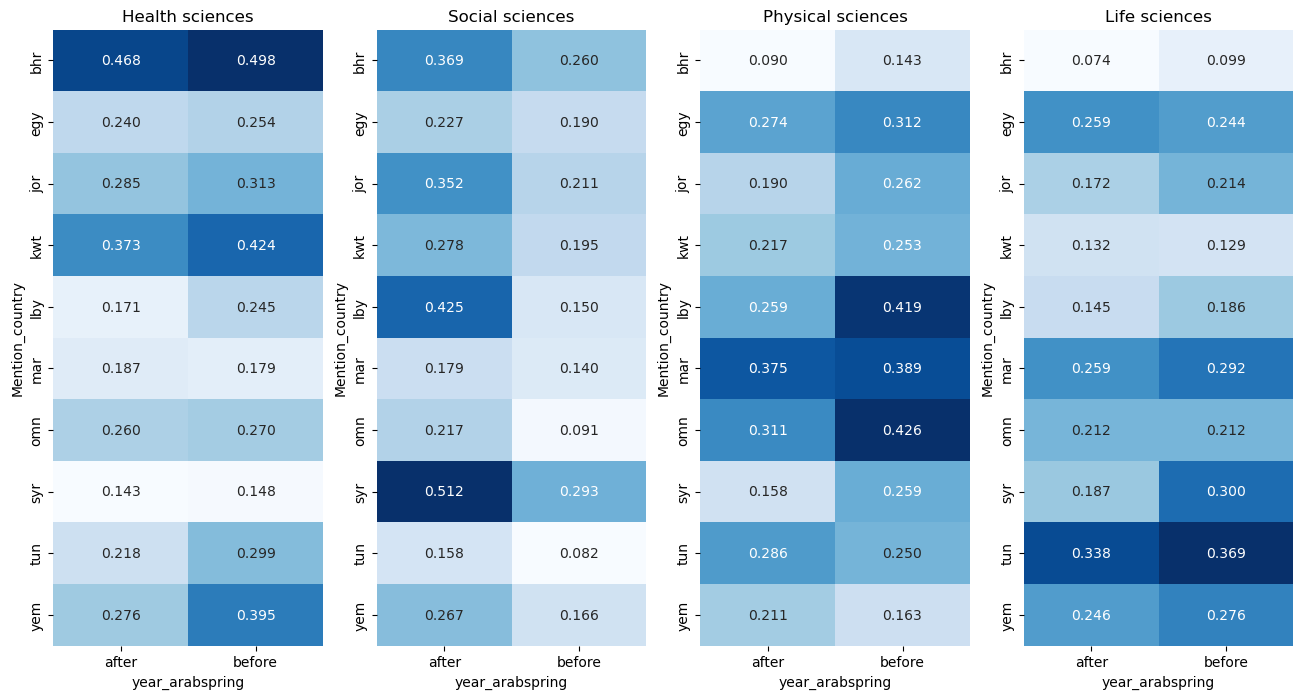

In [72]:
fig, ax=plt.subplots(nrows=1, ncols=4, figsize=(16,8))

for i, category in enumerate(['Health sciences', 'Social sciences', 'Physical sciences', 'Life sciences']):
    data = result_df.query(f'cat=="{category}"').pivot(index='Mention_country', columns='year_arabspring', values='Share')
    sns.heatmap(data, annot=True, fmt=".3f", cmap="Blues", ax=ax[i],cbar=False)
    ax[i].set_title(category)


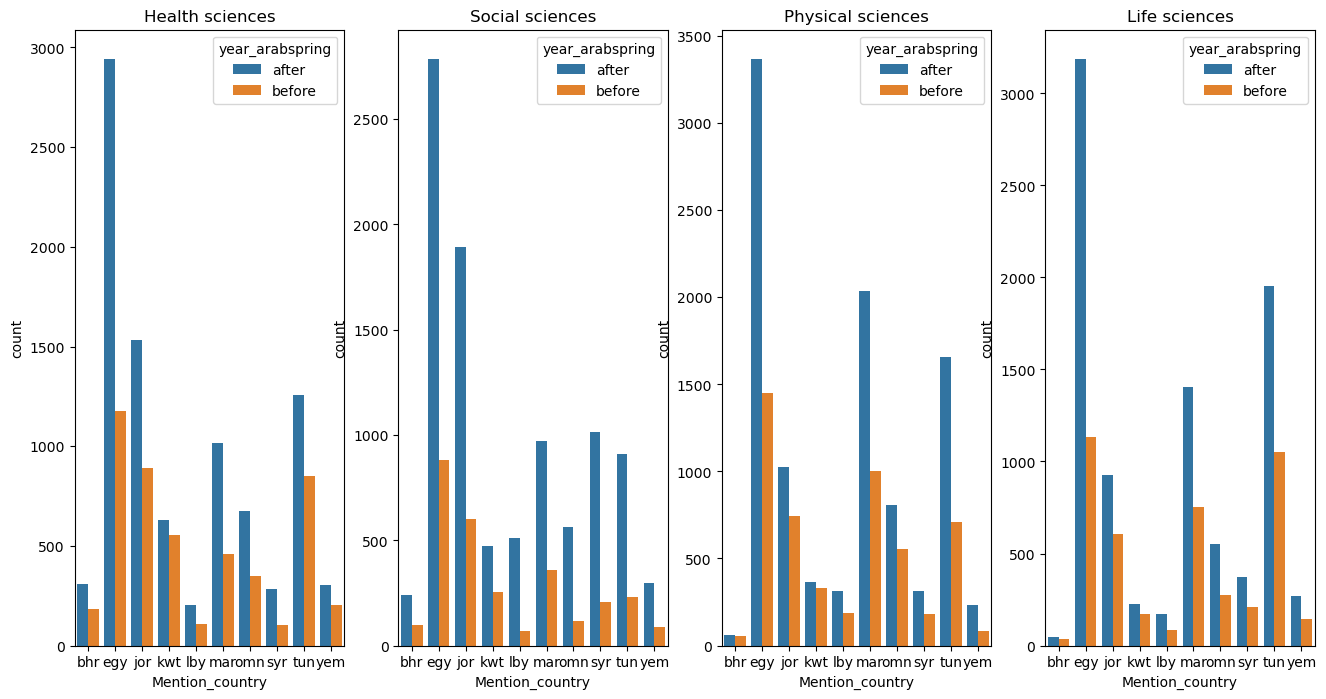

In [74]:
fig, ax=plt.subplots(nrows=1, ncols=4, figsize=(16,8))

for i, category in enumerate(['Health sciences', 'Social sciences', 'Physical sciences', 'Life sciences']):
    sns.barplot(data=result_df.query(f'cat=="{category}"'), x='Mention_country', y='count', hue='year_arabspring', ax=ax[i])
    ax[i].set_title(category)


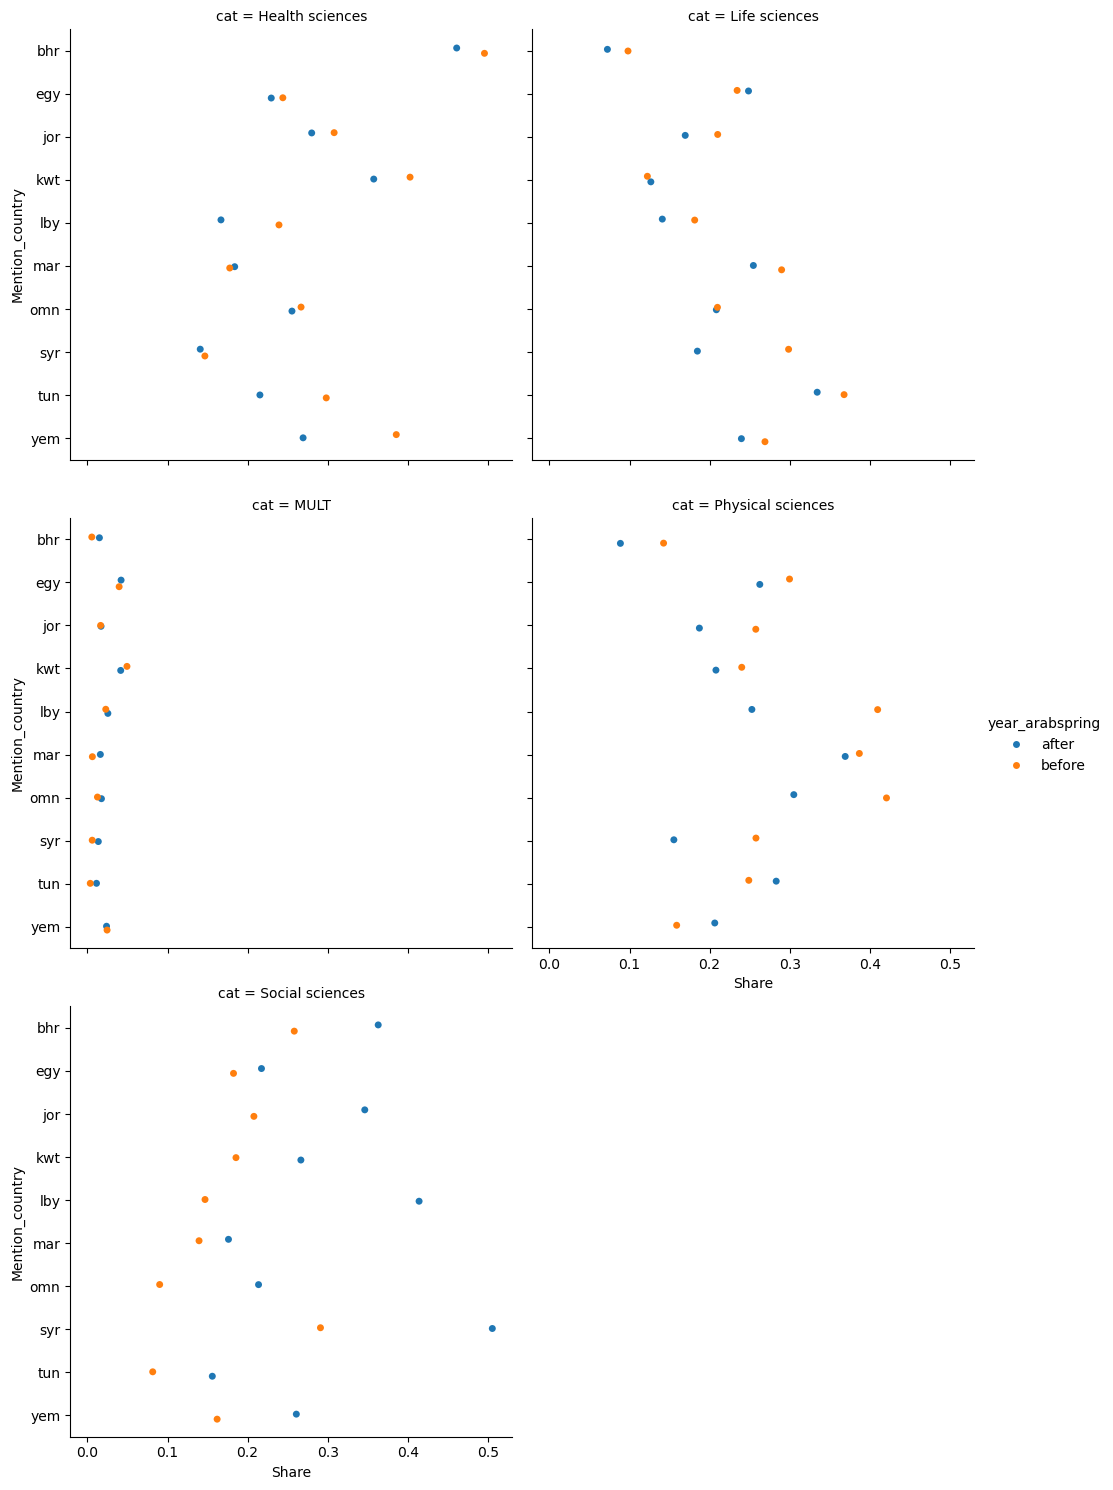

In [100]:
sns.catplot(data=result_df, x='Share', y='Mention_country', hue='year_arabspring', kind='strip', col='cat', col_wrap=2)


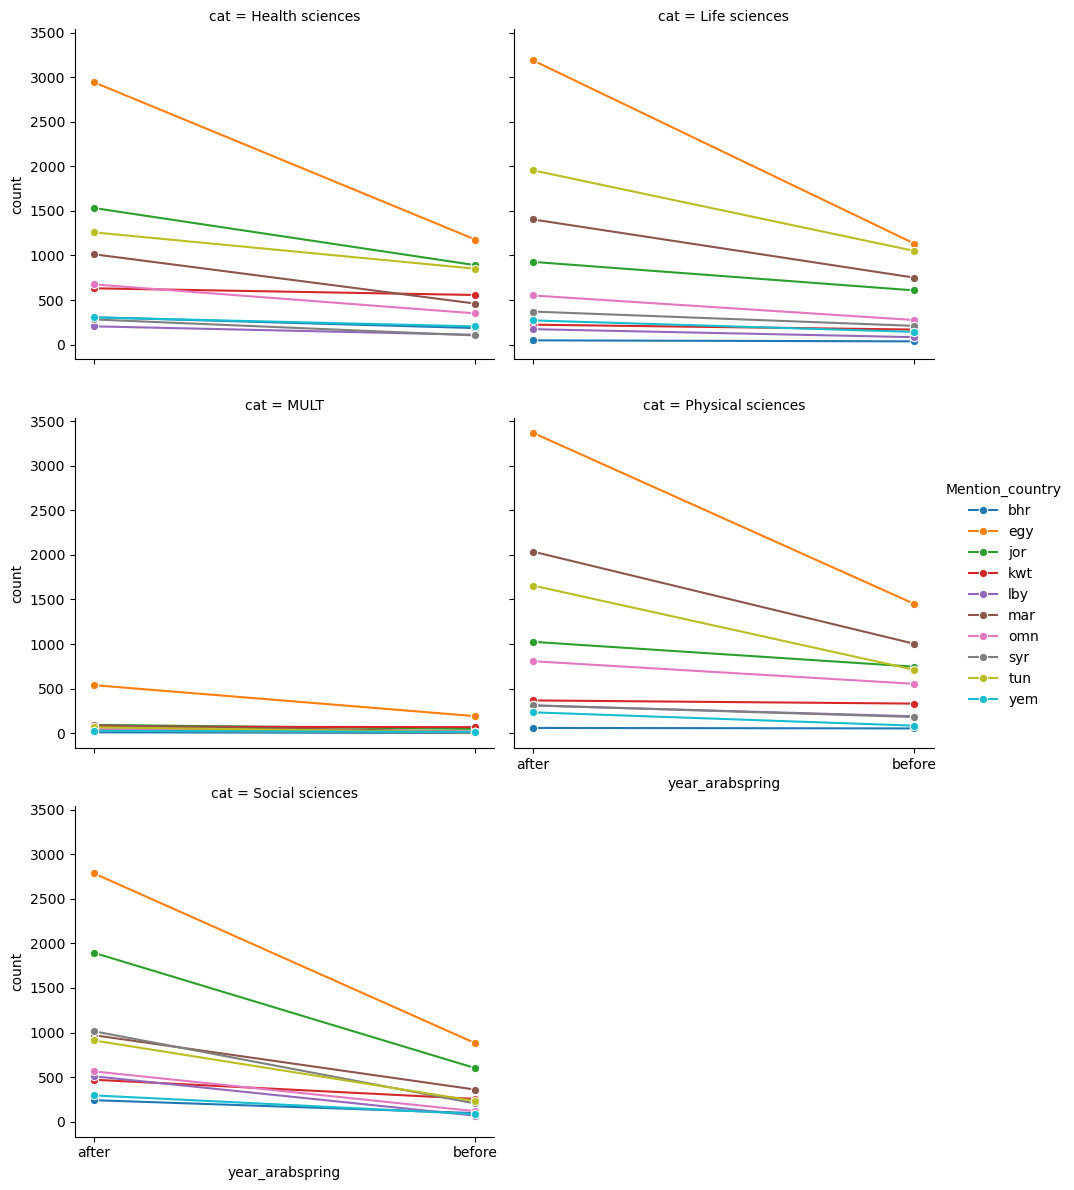

In [103]:
g = sns.FacetGrid(result_df, col="cat", hue="Mention_country", height=4, aspect=1.2, col_wrap=2)
g.map(sns.lineplot, "year_arabspring", "count", marker="o")
g.add_legend()


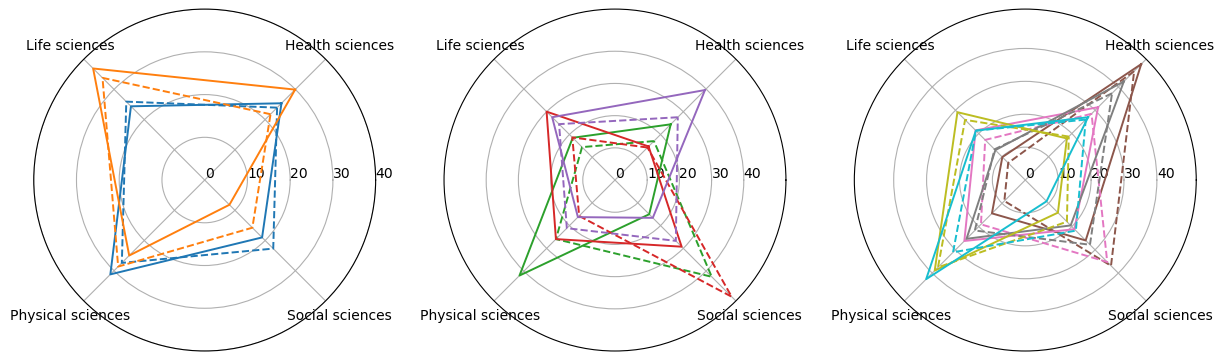

In [209]:
# Define data for 3 radar plots
categories = ['Health sciences', 'Life sciences', 'Physical sciences', 'Social sciences']
num_vars = len(categories)
Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]

# Create a figure for the subplots with more grid circles
fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw=dict(polar=True))

country_groups = [['egy', 'tun'], ['lby', 'syr', 'yem'], ['bhr', 'jor', 'kwt', 'mar', 'omn']]

j=0
for i, group in enumerate(country_groups):
    ax=axes[i]
    for country in group:
        data_before=list(result_df[(result_df['Mention_country']==country)&(result_df['year_arabspring']=='before')]['Share'].values *100)
        data_after=list(result_df[(result_df['Mention_country']==country)&(result_df['year_arabspring']=='after')]['Share'].values *100)
        
        # Calculate angles for the radar plot
        angles = np.linspace(np.pi/4, 2 * np.pi+np.pi/4, num_vars, endpoint=False).tolist()
        angles+=angles[:1]

        # Plot the radar cha 
        ax.plot(angles, data_after+data_after[:1], linewidth=1.4, color=f'C{j}', linestyle='--')
        ax.plot(angles, data_before+data_before[:1], linewidth=1.4, color=f'C{j}')

        # Add category labels
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)

        # Add grid circles for more granularity
        ax.set_rgrids(np.arange(0, 50,10), angle=0)

        j+=1





In [207]:
result_df[(result_df['Mention_country']==country)&(result_df['year_arabspring']=='before')]

,cat,Mention_country,year_arabspring,count,total,Share
13,Health sciences,omn,before,350.780785,1298.752548,0.270091
33,Life sciences,omn,before,275.898211,1298.752548,0.212433
53,Physical sciences,omn,before,553.446920,1298.752548,0.426137
73,Social sciences,omn,before,118.626631,1298.752548,0.091339


In [156]:
angles

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]

In [125]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()